# Test Notebook

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import numpy.random as npr
from PIL import Image
import cv2
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
import warnings
import json
import gc
from sklearn.model_selection import ParameterGrid
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('bmh')

In [2]:
def plot_learning_curve(history, title):
    key_names = list(history.keys())
    colors = ['-r','--b','-og','-.k']

    plt.figure(figsize=(8,5))
    for i in range(len(key_names)):
        plt.plot(history[key_names[i]], colors[i], label=key_names[i])
    plt.legend(fontsize=15,ncol=2)
    plt.title('Learning Curves for ' + title, size=15);

# Dataset 1: Flower species classification

In [3]:
class_names = ['Roses', 'Magnolias', 'Lilies', 'Sunflowers', 'Orchids', 
               'Marigold', 'Hibiscus', 'Firebush', 'Pentas', 'Bougainvillea']

In [4]:
# Loading Training Data
X_test = np.load('flower_species_classification/data_test.npy').T
t_test = np.load('flower_species_classification/labels_test.npy')

print(X_test.shape, t_test.shape)

(415, 270000) (415,)


In [5]:
X_test = X_test.reshape(-1, 300, 300, 3) / 255.0

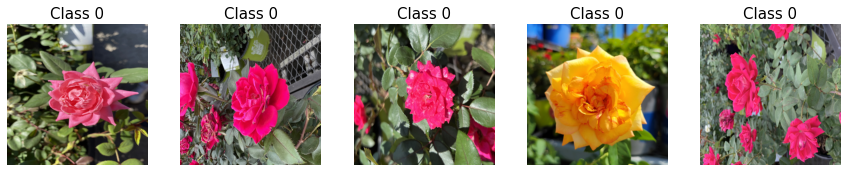

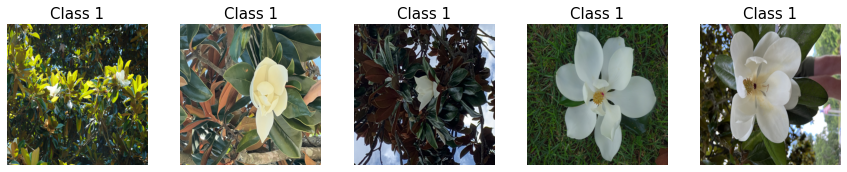

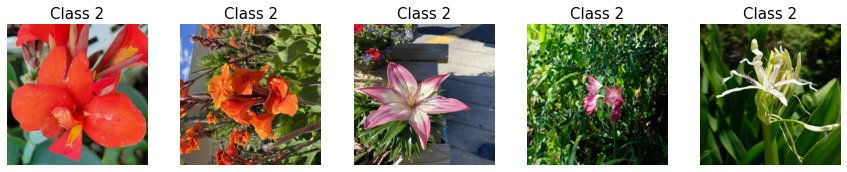

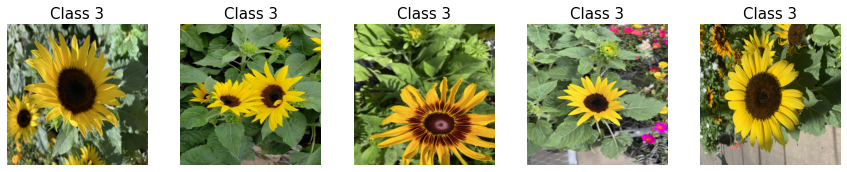

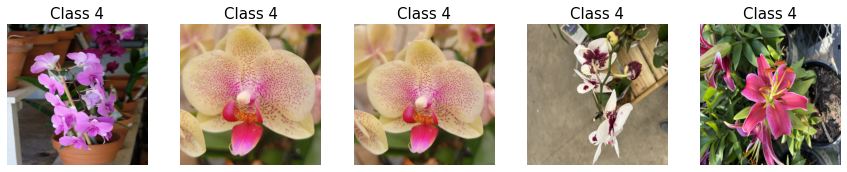

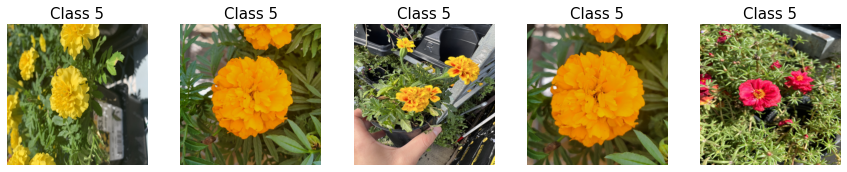

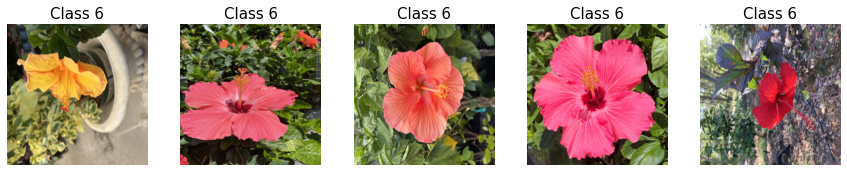

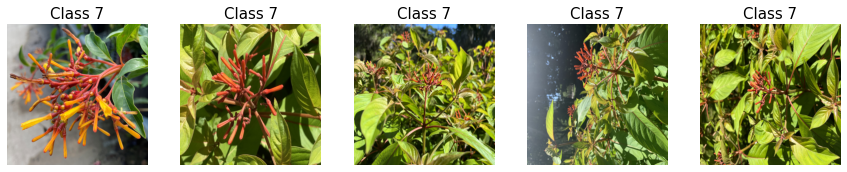

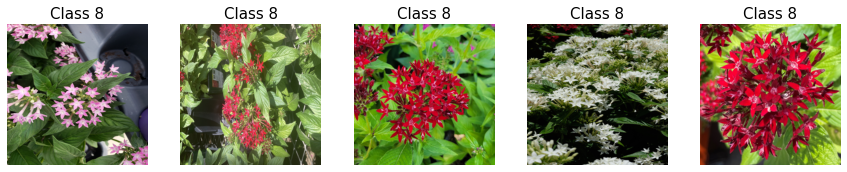

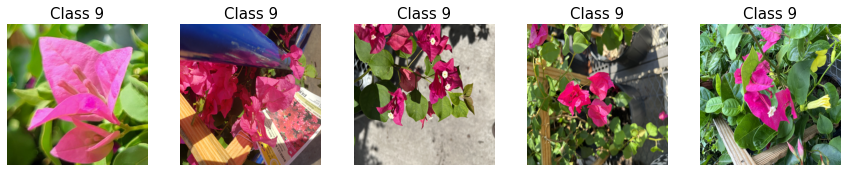

In [6]:
# Displaying some random examples per class

for i in range(0,10):
    rnd_sample = npr.permutation(np.where(t_test==i)[0])
    fig=plt.figure(figsize=(15,15))
    for j in range(5):
        fig.add_subplot(5,5,j+1)
        plt.imshow(X_test[rnd_sample[j],:].reshape((300,300,3)))
        plt.axis('off');plt.title('Class '+str(int(t_test[rnd_sample[j]])),size=15)
    plt.show()
    print('\n\n')

In [7]:
# model1 = load_model("best_model1.h5")

2023-12-06 22:18:22.475084: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-06 22:18:25.090375: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 78911 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:0f:00.0, compute capability: 8.0
2023-12-06 22:18:25.093842: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 78911 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:87:00.0, compute capability: 8.0
2023-12-06 22:18:25.095530: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/rep

In [8]:
predictions = model1.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

2023-12-06 22:18:28.097814: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8201
2023-12-06 22:18:29.892984: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


In [9]:
del model1

In [10]:
# Calculate metrics
accuracy = accuracy_score(t_test, predicted_classes)
precision = precision_score(t_test, predicted_classes, average='macro')
recall = recall_score(t_test, predicted_classes, average='macro')
f1 = f1_score(t_test, predicted_classes, average='macro')

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Confusion Matrix
conf_matrix = confusion_matrix(t_test, predicted_classes)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7710843373493976
Precision: 0.7974186899214291
Recall: 0.7754198780083512
F1 Score: 0.773455374217114
Confusion Matrix:
 [[31  1  2  0  0  1  5  1  7  0]
 [ 0 42  1  0  0  0  0  1  0  0]
 [ 0  2 34  0  2  2  1  4  0  1]
 [ 0  0  1 30  0  4  1  0  0  0]
 [ 0  2  8  0 34  0  0  0  1  0]
 [ 0  0  0  1  1 36  0  1  1  0]
 [ 1  3  5  0  0  1 29  2  1  1]
 [ 0  0  1  0  0  0  0 36  0  0]
 [ 0  4  1  0  0  0  0  4 22  1]
 [ 0  0 11  0  1  0  0  0  6 26]]


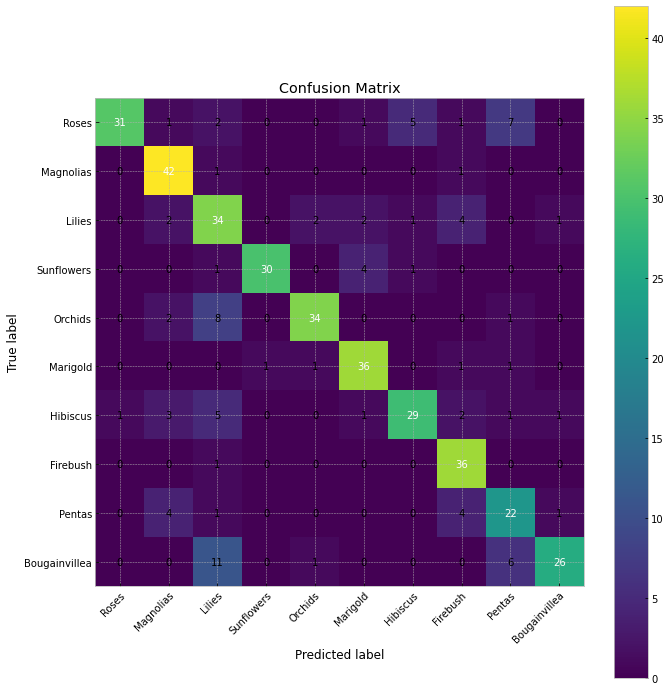

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(conf_matrix, interpolation='nearest')
ax.figure.colorbar(im, ax=ax)

# Show all ticks and label them with the respective list entries
ax.set(xticks=np.arange(conf_matrix.shape[1]),
       yticks=np.arange(conf_matrix.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(j, i, format(conf_matrix[i, j], 'd'),
                ha="center", va="center",
                color="white" if conf_matrix[i, j] > thresh else "black")
fig.tight_layout()
plt.show()

# Dataset 2: Car Detection Dataset

In [12]:
bbox = pd.read_csv("test_bounding_boxes.csv")
bbox

,image,xmin,ymin,xmax,ymax
0,vid_5_26580.jpg,156,166,352,266
1,vid_5_26620.jpg,224,167,424,278
2,vid_5_26680.jpg,538,160,673,232
3,vid_5_26700.jpg,302,166,435,244
4,vid_5_26720.jpg,186,165,405,265
5,vid_5_26720.jpg,463,157,646,246
6,vid_5_26720.jpg,69,173,179,241
7,vid_5_26740.jpg,124,173,306,263
8,vid_5_26760.jpg,219,156,424,267
9,vid_5_26760.jpg,510,135,654,231


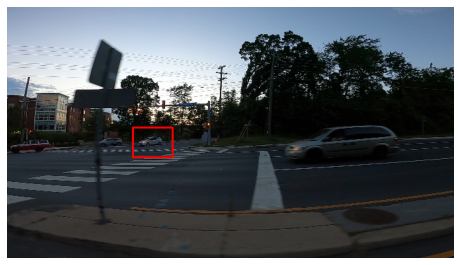

In [13]:
# Select a random sample
random_index = 31
sample = bbox.iloc[random_index]

# Load the corresponding image
filename = 'car_detection_dataset/testing_images/' + sample['image']
image = cv2.imread(filename)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

# Extract bounding box coordinates and convert them to integers
x_min, y_min, x_max, y_max = map(int, sample[1:])

# Draw the bounding box on the image
cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)

# Display the image
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis('off')
plt.show()
plt.close()

In [14]:
N = len(bbox)  # Number of training samples

# Initialize arrays for images and labels
X_test = []
t_test = []

# Load and preprocess images
for i in range(N):
    filename = 'car_detection_dataset/testing_images/' + bbox['image'][i]
    image = np.array(Image.open(filename))
    X_test.append(image)
    t_test.append(bbox.iloc[i, 1:].values)

X_test = np.array(X_test, dtype='float32') / 255.0  # Normalize pixel values
t_test = np.array(t_test, dtype='float32')
print(X_test.shape)

(57, 380, 676, 3)


In [15]:
model2 = load_model("best_model2.h5")

In [16]:
predictions = model2.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

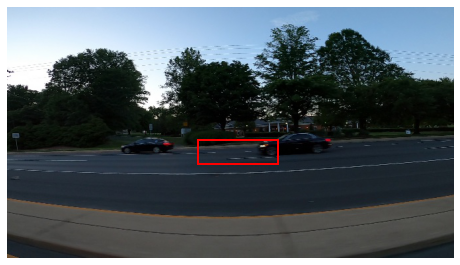

In [17]:
# Select a random sample
random_index = random.randint(0, len(X_test) - 1)
sample_image = X_test[random_index]
predicted_bbox = predictions[random_index]
predicted_bbox = np.round(predicted_bbox).astype(int)  # Round to nearest integer

# Draw the predicted bounding box on the image
plt.figure(figsize=(8, 8))
plt.imshow(sample_image)
plt.gca().add_patch(plt.Rectangle((predicted_bbox[0], predicted_bbox[1]), 
                                  predicted_bbox[2] - predicted_bbox[0], 
                                  predicted_bbox[3] - predicted_bbox[1],
                                  linewidth=2, edgecolor='red', facecolor='none'))
plt.axis('off')
plt.show()

In [18]:
def calculate_iou(boxA, boxB):
    # Determine the coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    # Compute the area of intersection
    intersection_area = max(0, xB - xA + 1) * max(0, yB - yA + 1)

    # Compute the area of both bounding boxes
    boxA_area = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxB_area = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)

    # Compute the IoU
    iou = intersection_area / float(boxA_area + boxB_area - intersection_area)
    return iou

In [19]:
# Calculate IoU for each prediction
ious = [calculate_iou(t_test[i], predictions[i]) for i in range(len(predictions))]

# Calculate the average IoU
average_iou = np.mean(ious)
print("Average IoU:", average_iou)

Average IoU: 0.11629960677169661


To study and quantify the performance of the results we need to address the challenge of overlapping Region of Interest (ROI). Addressing overlapping Regions of Interest (ROIs) in classification often involves leveraging the Intersection over Union (IoU) metric. We have used IoU to quantifies the degree of overlap between the predicted bounding box and the ground truth bounding box (manually labelled). Thus, an IoU value of 1 is ideal. In our test set, we have obtained an average IoU value of 0.11.

In [20]:
# del model1

In [21]:
del model2

## Discussions

- We can perform hyperparameter training using a grid search strategy to find the best model architecture. In the experiments, we have performed hyperparameter tuning on the convolution layers, dense layers, learning rate and dropout.
    
- We have displayed the learning curves for both the model training and observed that loss on object detection was very high since applying mse on bounding box will give higher values.

- We have used MakeSenseAI to manually label a few of the samples and test our model. In the case when no target labels are provded, we can use the Intersection over Union (IoU) metric to verify the detection performance against the ground truth bounding boxes. Therefore, we were able to perform tests on the given samples using this strategy and identify images with and without cars.
    
- Addressing the case where no car is present in the image, we can set the bounding boxes of such samples to [0,0,0,0]. If this smaple is predicted by the model with an IoU $>$ 0, we can simply classify this result as a False Positive.  This will enable us to predict the performance of the model on the test set quantitatively. Since we can use the misclassification parameter, there is a possibility to sample out the best threshold value from the precision recall curve for the Margin of Error (MoE). The solution is now simple, choose the model with the best balance.
    
- When the exact bounding box is not the target, we can evaluate performance in the test set using IoU metric discussed in the results. 